In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'dataset FYP'

In [3]:
name_class = os.listdir(file_path)
name_class

['acute_lymphocytic',
 'acute_myelogenous',
 'chronic_lymphocytic',
 'chronic_myelogenous',
 'healthy_blood_cell']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (1).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (10).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (100).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (101).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (102).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (103).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (104).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (105).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (106).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (107).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (108).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (109).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (11).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (110).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (111).jpg',
 'dataset FYP\\acute_lymphocy

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_ly

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset FYP\healthy_blood_cell\healthy_blood_c...,healthy_blood_cell
1,dataset FYP\chronic_lymphocytic\chronic_lympho...,chronic_lymphocytic
2,dataset FYP\chronic_myelogenous\chronic_myelog...,chronic_myelogenous
3,dataset FYP\acute_lymphocytic\acute_lymphocyti...,acute_lymphocytic
4,dataset FYP\chronic_myelogenous\chronic_myelog...,chronic_myelogenous


In [8]:
#balancing

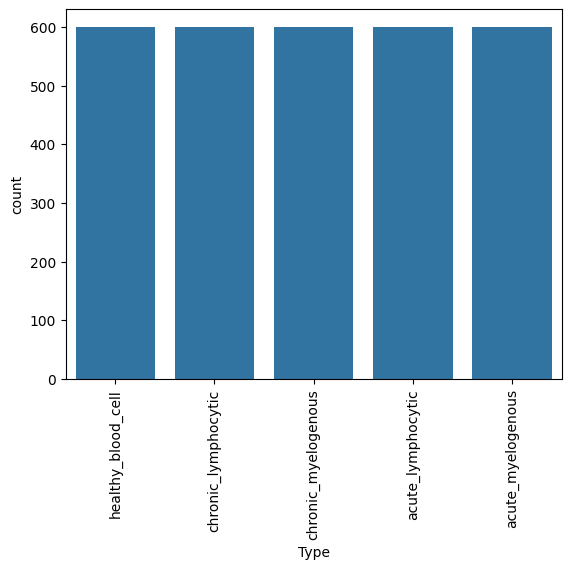

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

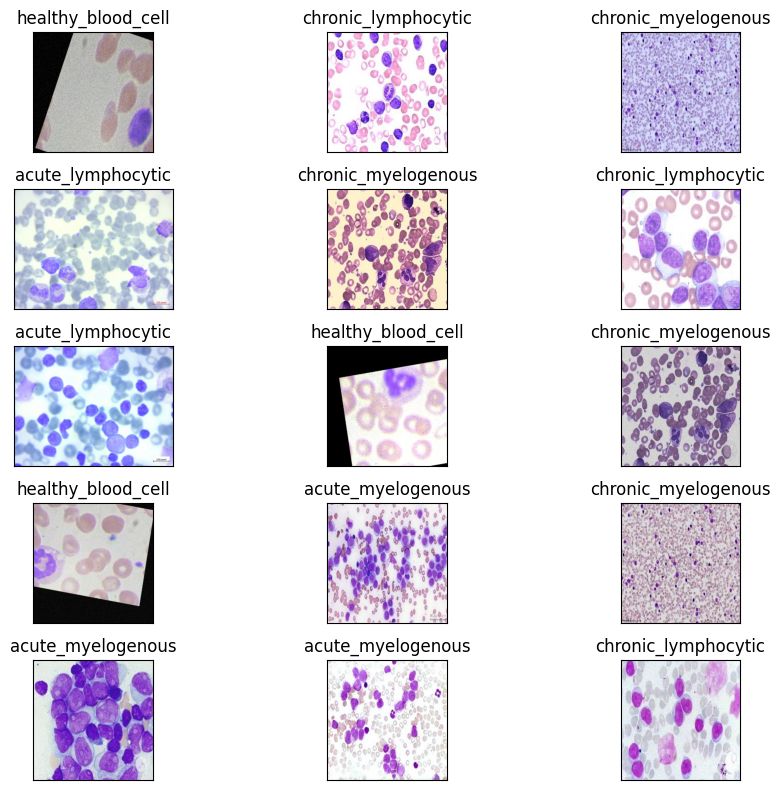

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2400 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

pretrained_model = VGG16(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
75/75 [==============================] - 257s 3s/step - loss: 1.3925 - accuracy: 0.6275 - val_loss: 0.6866 - val_accuracy: 0.7617
Epoch 2/50
75/75 [==============================] - 257s 3s/step - loss: 0.5376 - accuracy: 0.8004 - val_loss: 0.4404 - val_accuracy: 0.8250
Epoch 3/50
75/75 [==============================] - 253s 3s/step - loss: 0.4113 - accuracy: 0.8396 - val_loss: 0.3737 - val_accuracy: 0.8733
Epoch 4/50
75/75 [==============================] - 488s 7s/step - loss: 0.2978 - accuracy: 0.8908 - val_loss: 0.2888 - val_accuracy: 0.8967
Epoch 5/50
75/75 [==============================] - 256s 3s/step - loss: 0.3257 - accuracy: 0.8821 - val_loss: 0.2851 - val_accuracy: 0.8883
Epoch 6/50
75/75 [==============================] - 253s 3s/step - loss: 0.2584 - accuracy: 0.9054 - val_loss: 0.2898 - val_accuracy: 0.8900
Epoch 7/50
75/75 [==============================] - 253s 3s/step - loss: 0.2353 - accuracy: 0.9175 - val_loss: 0.2480 - val_accuracy: 0.9100
Epoch 8/50
75

In [19]:
model.save("model_vgg16_model2.h5")  

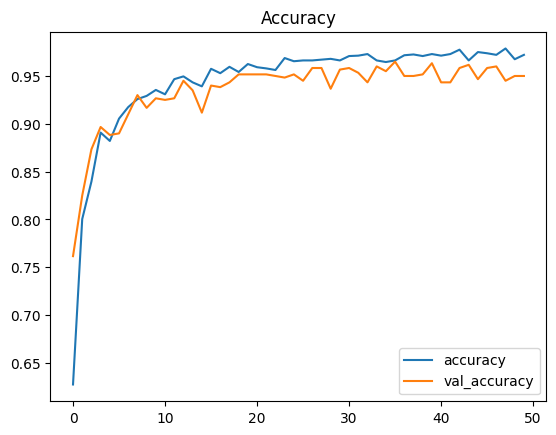

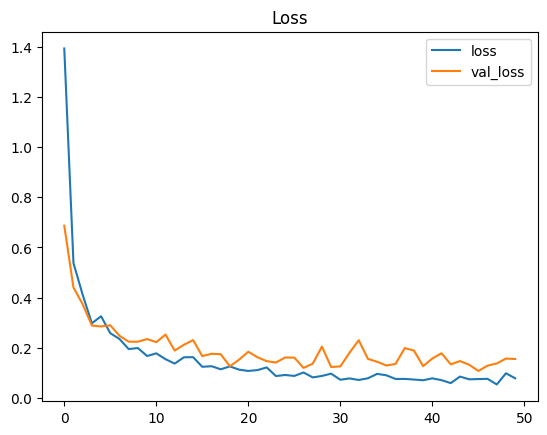

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [23]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.13391
Test Accuracy: 95.83%


In [24]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

19/19 [==============================] - 66s 3s/step


In [25]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

  acute_lymphocytic       0.97      1.00      0.99       107
  acute_myelogenous       0.99      0.94      0.97       137
chronic_lymphocytic       0.94      0.91      0.92       106
chronic_myelogenous       0.87      0.97      0.92       121
 healthy_blood_cell       0.99      0.95      0.97       129

           accuracy                           0.95       600
          macro avg       0.95      0.95      0.95       600
       weighted avg       0.96      0.95      0.95       600



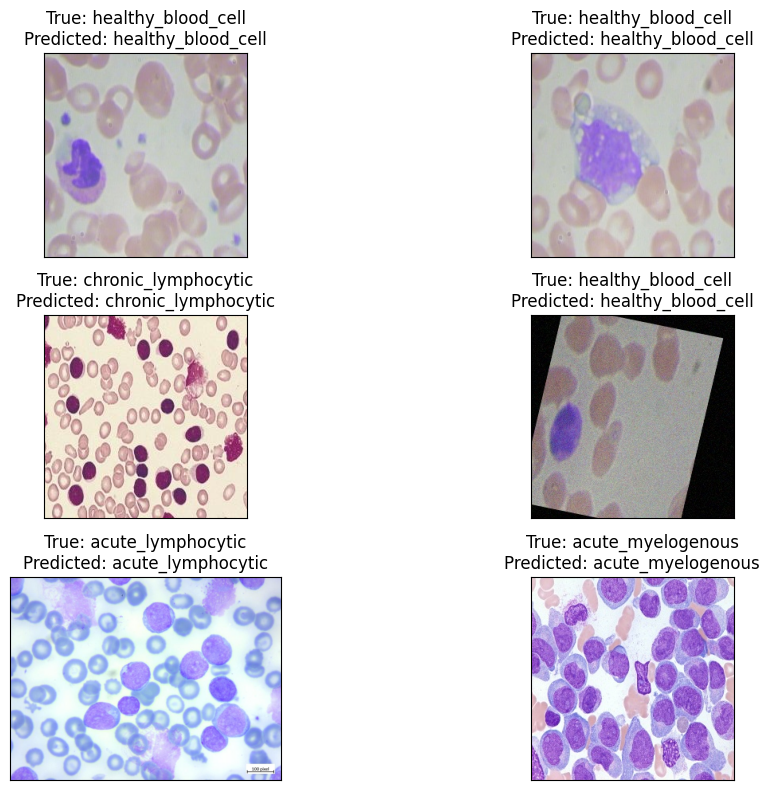

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [29]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'chronic_lymphocytic (569).jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 0s 158ms/step
[[ 0  0 99  0  0]]


In [30]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_vgg16_model2.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [32]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'chronic_lymphocytic (569).jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 0s 184ms/step
[[ 0  0 99  0  0]]


In [33]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 0, 99, 0, 0]


In [34]:
print("Largest element is:", max(pp))

Largest element is: 99


In [35]:
index = pp.index(max(pp))

In [36]:
name_class=["acute_lymphocytic","acute_myelogenous","chronic_lymphocytic","chronic_myelogenous","healthy_blood_cell"]

In [37]:
name_class[index]

'chronic_lymphocytic'

In [38]:
import matplotlib.pyplot as plt

In [39]:
plt.imread(img_path)

array([[[235, 218, 254],
        [239, 222, 255],
        [233, 216, 250],
        ...,
        [232, 210, 255],
        [237, 215, 255],
        [238, 216, 255]],

       [[217, 200, 236],
        [228, 211, 245],
        [253, 236, 255],
        ...,
        [239, 218, 255],
        [234, 212, 255],
        [227, 206, 249]],

       [[200, 183, 219],
        [244, 227, 255],
        [238, 221, 255],
        ...,
        [243, 222, 255],
        [243, 222, 255],
        [238, 217, 255]],

       ...,

       [[234, 222, 246],
        [245, 233, 255],
        [236, 222, 248],
        ...,
        [255, 242, 255],
        [241, 225, 251],
        [233, 217, 243]],

       [[238, 229, 250],
        [244, 234, 255],
        [239, 226, 252],
        ...,
        [248, 232, 255],
        [245, 229, 255],
        [249, 233, 255]],

       [[224, 215, 236],
        [226, 217, 238],
        [228, 215, 241],
        ...,
        [242, 226, 252],
        [241, 225, 251],
        [253, 237, 255]]

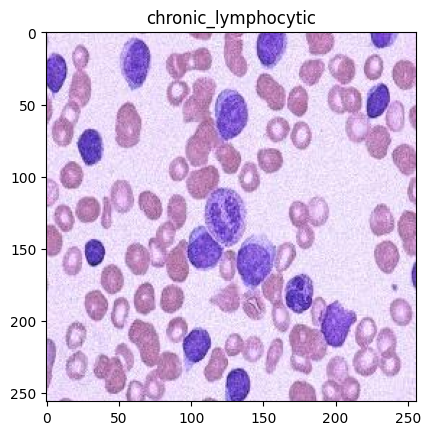

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()